# **Logistic Regression**

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split 

In [10]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [11]:
import numpy.random as r # We will randomly initialize our weights
from sklearn.metrics import accuracy_score # 

## Loading Dataset

In [12]:
df = pd.read_csv('heart.csv')
data = df.to_numpy()

In [13]:
df.shape

(303, 14)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X_data = data[:, :-1]
y_data = data[:, -1]

## **1. Data Preprocessing**

### 1.1. Splitting data
We divide our dataset into a training set and a testing set:
- **Training Set**: 80%
- **Testing Set**: 20%

Use the `train_test_split` function to achieve this split:
- Assign results to: `X_train`, `X_test`, `y_train`, `y_test`
- Set `random_state` to 42 to ensure reproducibility.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

### 1.2. Scaling the Data Using Standard Scaler

In [17]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler() # Reshape `y_train` into 2D array, and `y_test` into 2D array 
y_2d_train = np.reshape(y_train, (-1, 1))
y_2d_test = np.reshape(y_test, (-1, 1))
X_train_unscaled = X_train
X_test_unscaled = X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 1.3. Adding a Bias Term to Design Matrix $X_{\text{train}}$ and $X_{\text{test}}$
To account for the intercept term in our logistic regression model, we augment our feature matrices with a column of ones. This is often referred to as the bias term.


In [18]:
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones,X_train))

## **Logistic Regression Functions**

#### 3.1.3. Sigmoid(z)

$$\sigma (z) = \frac{1}{1 + e^{-z}}$$

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### 3.1.4. Prediction Function

$$ h(x) = \frac{1}{1 + e^{-(w_0+w_1x_1+w_2x_2+...+w_dx_d)}} $$

$$ h(x) = \frac{1}{1 + e^{-Xw}} $$

In [20]:
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

#### 3.1.5. Log_likelihood Function

$$ l(w) = \sum_{i=1}^{N} y^{(i)}ln(h(x^{(i)})) + (1 - y^{(i)})ln(1 - h(x^{(i)})) $$

In [21]:
def log_likelihood(X, y, w):
    y_hat = hypothesis(X, w)
    return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))

#### 3.1.6. Gradient Ascent

In [22]:
def gradient_ascent(X, y, learning_rate, num_iters):
    N = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    
    log_likelihood_values = []
    X_transpose = np.transpose(X)

    # Gradient Ascent - local optimization technique
    i = 0
    while i < num_iters:
        w += (learning_rate / N) * (X_transpose @ (y - hypothesis(X, w)))
        i += 1

        # Computing log likelihood of seeing examples for current value of w
        if (i % 10) == 0:
            log_likelihood_values.append(log_likelihood(X, y, w))

    return w, log_likelihood_values

In [23]:
learning_rate = 0.0000001
num_iters = 100000
w, log_likelihood_values = gradient_ascent(X_train_1, y_2d_train, learning_rate, num_iters)

#### 3.1.7. Predict the Class Label

In [24]:
def predict_class(X, w, t = 0.5):
    p = hypothesis(X, w)
    p_class = np.zeros(p.shape)  
    p_class[p >= t] = 1
    return p_class

#### 3.1.8. Evaluating our hypothesis using the test dataset

In [25]:
t = 0.5
# First augment the test dataset with a column of ones.
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))
# Now predict the label of each example in your test set
y_hat = predict_class(X_test_1, w, t)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: >

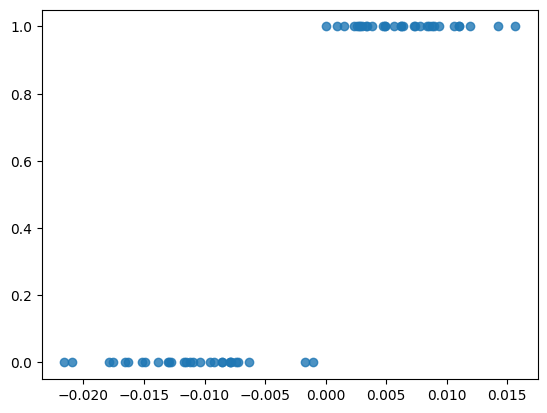

In [26]:
sns.regplot(x=np.dot(X_test_1, w), y=y_hat, data=data, logistic=True, ci=None)

#### 3.1.9. Precision, Recall and F1 Scores

##### 3.1.9.1. Precision and Recall

In [27]:
def precision_recall(y_hat, y):
    
    # Calculate false positive and false negative
    # HINT: if done correctly, false_pos should be 1 and false_neg should be 1
    false_pos = np.count_nonzero((y - y_hat) < 0)
    false_neg = np.count_nonzero((y - y_hat) > 0)

    # Calculate true positive and true negatives
    # HINT: if done correctly, true_pos should be 88
    true_pos = np.count_nonzero((y * y_hat) == 1)

    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    return precision,recall

In [28]:
prec, rec = precision_recall(y_hat, y_2d_test)

##### 3.1.9.2. F1

In [29]:
def f1(precision, recall):
    if precision + recall > 0:
        return 2 * (precision * recall) / (precision + recall)
    return 0

In [30]:
f1_score = f1(prec, rec)
print('Precision: ', prec)
print('Recall: ', rec)
print('F1 Score: ', f1_score)

Precision:  0.875
Recall:  0.875
F1 Score:  0.875


#### Accuracy

In [31]:
def accuracy(y_hat, y):
    correct = np.count_nonzero((y == y_hat))
    return correct / y.shape[0]

In [32]:
acc = accuracy(y_hat, y_2d_test)
print('Accuracy: ', acc)

Accuracy:  0.8688524590163934


##### 3.1.9.3. Confusion Matrix

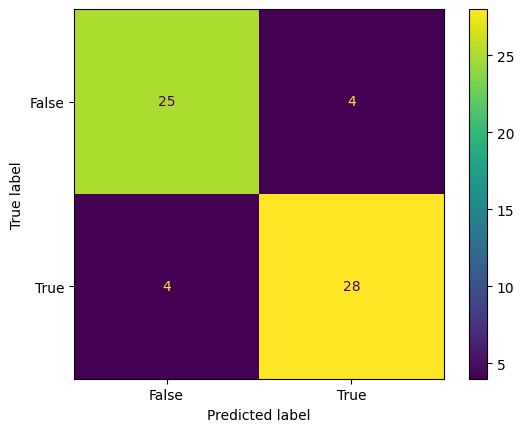

In [33]:
cm = metrics.confusion_matrix(y_2d_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

#### Trying Different Learning Rate

In [34]:
lr = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5]
num_iters = 100000

In [35]:
t = 0.5
best_alpha = 0
best_acc = 0
best_prec = 0
best_rec = 0
best_f1 = 0
for alpha in lr:
    w, log_likelihood_values = gradient_ascent(X_train_1, y_2d_train, alpha, num_iters)
    y_hat = predict_class(X_test_1, w, t)
    precision, recall = precision_recall(y_hat, y_2d_test)
    f1_score = f1(precision, recall)
    acc = accuracy(y_hat, y_2d_test)
    if acc > best_acc:
        best_acc = acc
        best_alpha = alpha
        best_prec, best_rec, best_f1 = precision, recall, f1_score
print("Best Alpha is", best_alpha, "with accuracy", best_acc)

Best Alpha is 0.0001 with accuracy 0.8852459016393442


### **3.2. Adding L1 Regularization**

#### Sklearn's implementation of Logistic regression

In [36]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(penalty=None)

# Fit the model
logreg.fit(X_train, y_train)

w_logreg = logreg.coef_
intercept_logreg = logreg.intercept_

##### Performance measure: Accuracy

In [37]:
# Find the predicted values on test set (X_test not X_test_1) using logreg.predict
y_hat_logreg = logreg.predict(X_test)

# Find the accuracy achieved on test set using logreg.score and y_test 
acc_logreg = logreg.score(X_test, y_test)

print("Accuracy on training data = %f" % acc_logreg)

Accuracy on training data = 0.852459


##### Performance Metrics: precision, recall, F1 score

In [38]:
from sklearn.metrics import precision_recall_fscore_support
prec, recal, fscore, sup = precision_recall_fscore_support(y_test, y_hat_logreg)
print('Precision:', prec)
print('Recall: ', recal)
print('F1 Score: ', fscore)

Precision: [0.83333333 0.87096774]
Recall:  [0.86206897 0.84375   ]
F1 Score:  [0.84745763 0.85714286]


In [39]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV


# Initialize LogisticRegressionCV with 5-fold cross-validation and Lasso regularization
logreg_cv_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)

# Fit the model to the training data
logreg_cv_l1.fit(X_train, y_train)
w_logreg_cv_l1 = logreg_cv_l1.coef_
intercept_logreg_cv_l1 = logreg_cv_l1.intercept_

# Get the optimal λ value
optimal_lambda_l1 = 1/ (logreg_cv_l1.C_[0])
y_hat_logreg_cv_l1 = logreg_cv_l1.predict(X_test)
# Find the accuracy achieved on test set using logreg.score and y_test 
acc_valid_logreg_cv_l1 = logreg_cv_l1.score(X_test, y_test)
acc_train_logreg_cv_l1 = logreg_cv_l1.score(X_train, y_train)
acc_valid_logreg = logreg.score(X_test, y_test)
acc_train_logregv = logreg.score(X_train, y_train)

print("Using Lasso Regression")
print("Reg - Optimal λ:", optimal_lambda_l1)
print("Reg - Accuracy on validation data = %f" % acc_valid_logreg_cv_l1)
print("Reg - Accuracy on training data = %f" % acc_train_logreg_cv_l1)
print("No reg - Accuracy on validation data = %f" % acc_valid_logreg)
print("No reg - Accuracy on training data = %f" % acc_train_logregv)

Using Lasso Regression
Reg - Optimal λ: 0.3593813663804626
Reg - Accuracy on validation data = 0.852459
Reg - Accuracy on training data = 0.863636
No reg - Accuracy on validation data = 0.852459
No reg - Accuracy on training data = 0.863636


### **3.3. Adding L2 Regularization**

In [40]:
# Initialize LogisticRegressionCV with 5-fold cross-validation and ridge regularization
logreg_cv_l2 = LogisticRegressionCV(penalty='l2', cv=5)

# Fit the model to the training data
logreg_cv_l2.fit(X_train, y_train)
w_logreg_cv_l2 = logreg_cv_l2.coef_
intercept_logreg_cv_l2 = logreg_cv_l2.intercept_

# Get the optimal λ value
optimal_lambda_l2 = 1/ (logreg_cv_l2.C_[0])
y_hat_logreg_cv_l2 = logreg_cv_l2.predict(X_test)
# Find the accuracy achieved on test set using logreg.score and y_test 
acc_valid_logreg_cv_l2 = logreg_cv_l2.score(X_test, y_test)
acc_train_logreg_cv_l2 = logreg_cv_l2.score(X_train, y_train)

print("Using Ridge Regression")
print("Reg - Optimal λ:", optimal_lambda_l2)
print("Reg - Accuracy on validation data = %f" % acc_valid_logreg_cv_l2)
print("Reg - Accuracy on training data = %f" % acc_train_logreg_cv_l2)
print("No reg - Accuracy on validation data = %f" % acc_valid_logreg)
print("No reg - Accuracy on training data = %f" % acc_train_logregv)

Using Ridge Regression
Reg - Optimal λ: 0.3593813663804626
Reg - Accuracy on validation data = 0.852459
Reg - Accuracy on training data = 0.863636
No reg - Accuracy on validation data = 0.852459
No reg - Accuracy on training data = 0.863636


Both Lasso (L1 regularization) and Ridge (L2 regularization) regression models yield the same optimal λ value and accuracy scores for both validation and training datasets.

They both don't have any effect on the accuracy versus when there isn't regularization.

## Comparision between with vs. without Regularization

### Plotting confusion matrix

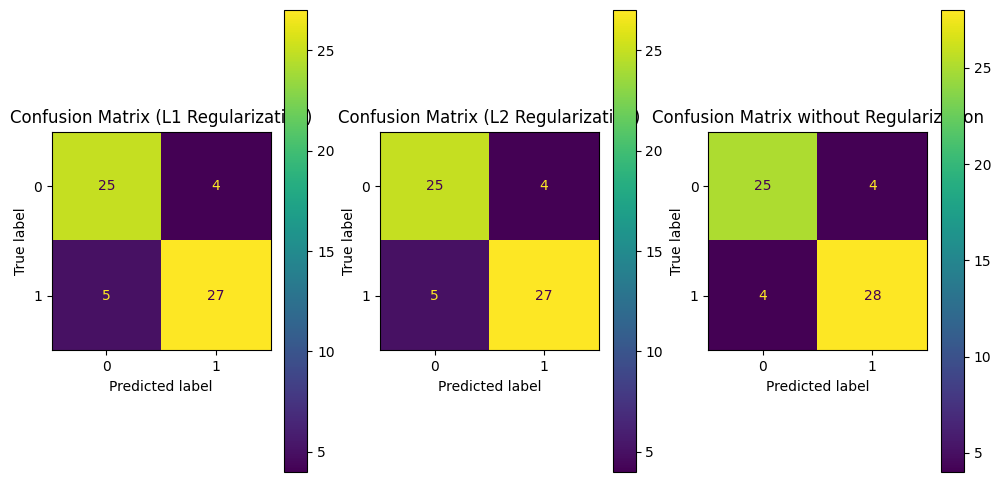

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting confusion matrix
cm_l1 = confusion_matrix(y_test, y_hat_logreg_cv_l1)
cm_l2 = confusion_matrix(y_test, y_hat_logreg_cv_l2)

disp_noreg = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_l1 = ConfusionMatrixDisplay(confusion_matrix=cm_l1)
disp_l2 = ConfusionMatrixDisplay(confusion_matrix=cm_l2)

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
disp_l1.plot(ax=ax[0])
ax[0].set_title('Confusion Matrix (L1 Regularization)')
disp_l2.plot(ax=ax[1])
ax[1].set_title('Confusion Matrix (L2 Regularization)')
disp_noreg.plot(ax=ax[2])
ax[2].set_title('Confusion Matrix without Regularization')
plt.show()

### Feature Transformation: Polynomial

#### Degree of 2

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg_2 = PolynomialFeatures(degree=2)
X_train_deg2 = poly_reg_2.fit_transform(X_train_1)
print("X_train_deg2.shape: ", X_train_deg2.shape)

X_train_deg2.shape:  (242, 120)


In [43]:
learning_rate = 0.0001
num_iters = 100000
w_deg2, log_likelihood_values_deg2 = gradient_ascent(X_train_deg2, y_2d_train, learning_rate, num_iters)

In [44]:
t = 0.5
ones = np.ones((X_test.shape[0], 1))
X_test_deg2 = poly_reg_2.fit_transform(np.hstack((ones, X_test)))
y_hat_deg2 = predict_class(X_test_deg2, w_deg2, t)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: >

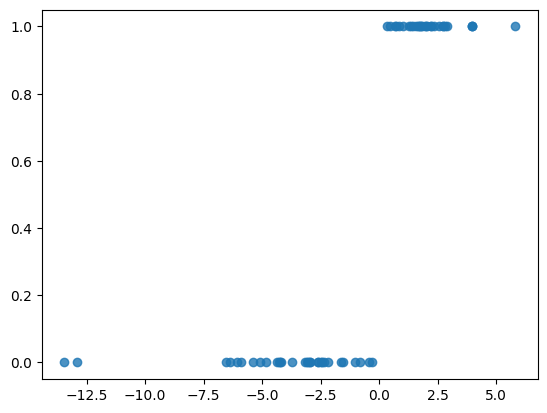

In [45]:
sns.regplot(x=np.dot(X_test_deg2, w_deg2), y=y_hat_deg2, data=data, logistic=True, ci=None)

In [46]:
precision_deg2, recall_deg2 = precision_recall(y_hat_deg2, y_2d_test)
f1_deg2 = f1(precision_deg2, recall_deg2)
acc_deg2 = accuracy(y_hat_deg2, y_2d_test)
print('Precision: ', precision_deg2)
print('Recall: ', recall_deg2)
print('F1 Score: ', f1_deg2)
print('Accuracy: ', acc_deg2)

Precision:  0.9
Recall:  0.84375
F1 Score:  0.870967741935484
Accuracy:  0.8688524590163934


#### Degree of 3

In [47]:
poly_reg_3 = PolynomialFeatures(degree=3)
X_train_deg3 = poly_reg_3.fit_transform(X_train_1)
print("X_train_deg3.shape: ", X_train_deg3.shape)

X_train_deg3.shape:  (242, 680)


In [48]:
learning_rate = 0.0001
num_iters = 100000
w_deg3, log_likelihood_values_deg3 = gradient_ascent(X_train_deg3, y_2d_train, learning_rate, num_iters)

In [49]:
t = 0.5
ones = np.ones((X_test.shape[0], 1))
X_test_deg3 = poly_reg_3.fit_transform(np.hstack((ones, X_test)))
y_hat_deg3 = predict_class(X_test_deg3, w_deg3, t)

<Axes: >

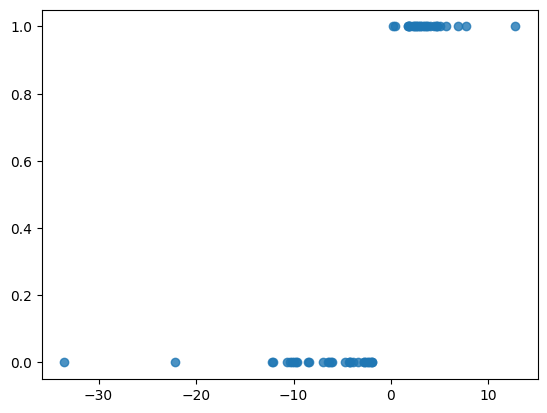

In [50]:
sns.regplot(x=np.dot(X_test_deg3, w_deg3), y=y_hat_deg3, data=data, logistic=True, ci=None)

In [51]:
precision_deg3, recall_deg3 = precision_recall(y_hat_deg3, y_2d_test)
f1_deg3 = f1(precision_deg3, recall_deg3)
acc_deg3 = accuracy(y_hat_deg3, y_2d_test)
print('Precision: ', precision_deg3)
print('Recall: ', recall_deg3)
print('F1 Score: ', f1_deg3)
print('Accuracy: ', acc_deg3)

Precision:  0.9333333333333333
Recall:  0.875
F1 Score:  0.9032258064516129
Accuracy:  0.9016393442622951


#### Degree of 4

In [52]:
poly_reg_4 = PolynomialFeatures(degree=4)
X_train_deg4 = poly_reg_4.fit_transform(X_train_1)
print("X_train_deg4.shape: ", X_train_deg4.shape)

X_train_deg4.shape:  (242, 3060)


In [53]:
learning_rate = 0.0001
num_iters = 100000
w_deg4, log_likelihood_values_deg4 = gradient_ascent(X_train_deg4, y_2d_train, learning_rate, num_iters)

/var/folders/bz/7dw6ttj96dd44tddjq_0fpv80000gn/T/ipykernel_51796/3442206285.py:3: RuntimeWarning: divide by zero encountered in log
  return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))


In [54]:
t = 0.5
ones = np.ones((X_test.shape[0], 1))
X_test_deg4 = poly_reg_4.fit_transform(np.hstack((ones, X_test)))
y_hat_deg4 = predict_class(X_test_deg4, w_deg4, t)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<Axes: >

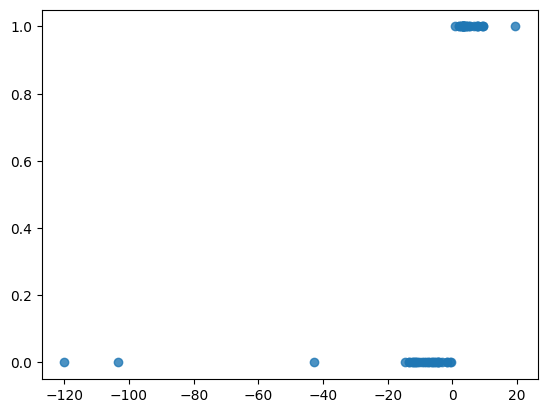

In [55]:
sns.regplot(x=np.dot(X_test_deg4, w_deg4), y=y_hat_deg4, data=data, logistic=True, ci=None)

In [56]:
precision_deg4, recall_deg4 = precision_recall(y_hat_deg4, y_2d_test)
f1_deg4 = f1(precision_deg4, recall_deg4)
acc_deg4 = accuracy(y_hat_deg4, y_2d_test)
print('Precision: ', precision_deg4)
print('Recall: ', recall_deg4)
print('F1 Score: ', f1_deg4)
print('Accuracy: ', acc_deg4)

Precision:  0.8666666666666667
Recall:  0.8125
F1 Score:  0.8387096774193549
Accuracy:  0.8360655737704918


### Comparison between Different Degree of Polynomial Feature Transfomation

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = [['Precision', best_prec, precision_deg2, precision_deg3, precision_deg4],
        ['Recall', best_rec, recall_deg2, recall_deg3, recall_deg4],
        ['F1', best_f1, f1_deg2, f1_deg3, f1_deg4],
        ['Accuracy', best_acc, acc_deg2, acc_deg3, acc_deg4]]

column = (" ", 'Without Transformation', '2', '3', '4')
from tabulate import tabulate
print(tabulate([['Precision', best_prec, precision_deg2, precision_deg3, precision_deg4], \
                ['Recall', best_rec, recall_deg2, recall_deg3, recall_deg4], \
                ['F1', best_f1, f1_deg2, f1_deg3, f1_deg4], \
                ['Accuracy', best_acc, acc_deg2, acc_deg3, acc_deg4]], headers=['Without Transformation', '2', '3', '4']))

             Without Transformation         2         3         4
---------  ------------------------  --------  --------  --------
Precision                  0.878788  0.9       0.933333  0.866667
Recall                     0.90625   0.84375   0.875     0.8125
F1                         0.892308  0.870968  0.903226  0.83871
Accuracy                   0.885246  0.868852  0.901639  0.836066


With polynomial feature transformation of 3rd degree, the model gives the highest accuracy, precision, and F1 score. For recall, model without transformation gets highest.